

# Project: Investigate a Dataset - No show appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset is based on data from 100k Brazilian hospital appointments and emphasizes on whether or not patients appear for their appointments. Each row contains a number of information about the subject. we will analyse the data to answer the following questions below.

### Overview of the Tasks
1. We are going to explore the data to get an understanding of the data our exploration will include checking the data type, size of the data, basic statistics for both the quantitative and qualitative data for example  mean, standard deviation, min and max values, frequencies and number of unique value
2. We are also going to perform data wrangling in this section we will be cleaning the data
3. After this we will sort out to answer basic question which will be reflected in the exploration section
4. Finally the result of our findings will be presented in the conclusion section
 

In [1]:
# Lets Import all required Packages for our Appointment Data analysis
"""
In the is project we are going to make of 
1. pandas and numpy to loading our data and perform data wrangling
2. seaborn and matplotlib for visualization
"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

plt.style.use("seaborn-colorblind")
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Lets load our Data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv', index_col="AppointmentID")
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5642503,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
5642549,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
5642828,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
5642494,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Checking the size of the data in terms of the number of observation and the field in the data
df.shape

(110527, 13)

In [4]:
# General overview of the data which includes the feature name, non missing observation per feature and the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 5642903 to 5629448
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   Gender          110527 non-null  object 
 2   ScheduledDay    110527 non-null  object 
 3   AppointmentDay  110527 non-null  object 
 4   Age             110527 non-null  int64  
 5   Neighbourhood   110527 non-null  object 
 6   Scholarship     110527 non-null  int64  
 7   Hipertension    110527 non-null  int64  
 8   Diabetes        110527 non-null  int64  
 9   Alcoholism      110527 non-null  int64  
 10  Handcap         110527 non-null  int64  
 11  SMS_received    110527 non-null  int64  
 12  No-show         110527 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 11.8+ MB


In [5]:
# Checking for missing values in the data
df.isna().sum()

PatientId         0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# Checking for duplicates in the data
df.duplicated().sum()

618

In [7]:
# Preview of the duplicate
df[df.duplicated()].head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,,
5636933,1.925263e+10,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
5639863,4.341600e+14,F,2016-04-29T09:43:15Z,2016-04-29T00:00:00Z,39,PRAIA DO CANTO,0,0,0,0,0,0,No
5600825,4.497415e+09,F,2016-04-19T11:16:27Z,2016-04-29T00:00:00Z,11,BELA VISTA,0,0,0,0,0,0,No
5629304,5.161239e+12,F,2016-04-27T13:16:02Z,2016-04-29T00:00:00Z,49,CONSOLAÇÃO,0,0,0,0,0,0,No
5521769,4.916356e+12,M,2016-03-29T12:40:26Z,2016-04-29T00:00:00Z,40,CENTRO,0,0,0,0,0,0,Yes


In [8]:
# Quantitative data statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,39217.84439,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
Age,110527.0,3.708887e+01,2.311020e+01,-1.00000,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.00000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [9]:
# Qualitative data statistics
df.describe(include="object").T

,count,unique,top,freq
Gender,110527,2,F,71840
ScheduledDay,110527,103549,2016-05-06T07:09:54Z,24
AppointmentDay,110527,27,2016-06-06T00:00:00Z,4692
Neighbourhood,110527,81,JARDIM CAMBURI,7717
No-show,110527,2,No,88208


In [10]:
df["Handcap"].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [11]:
df[df["Handcap"] > 1].sample(5)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,,
5778090,8.678294e+13,M,2016-06-06T15:02:34Z,2016-06-07T00:00:00Z,29,JARDIM DA PENHA,0,0,0,0,2,0,No
5683453,4.887540e+13,F,2016-05-11T07:32:16Z,2016-05-13T00:00:00Z,19,VILA RUBIM,0,0,0,0,2,0,No
5759764,3.131749e+13,M,2016-06-01T13:40:43Z,2016-06-01T00:00:00Z,25,SÃO PEDRO,0,0,0,0,2,0,No
5726469,4.717352e+14,M,2016-05-20T13:45:34Z,2016-05-25T00:00:00Z,77,CENTRO,0,1,1,0,2,1,No
5606904,3.425584e+11,M,2016-04-20T10:50:32Z,2016-05-24T00:00:00Z,54,SÃO CRISTÓVÃO,0,0,0,0,2,0,Yes


# Data Wrangling

## Tasks

* In the above section we have been able to identify issues with out data which is was we will be dealing with in this section

1. The schedule date and appointment day do not have the correct data type. They are loaded into pandas as object(str) hence, they will be converted to datetime
2. Our data contain 618 duplicates those duplicates will be dropped
3. This quantitative statistics also shows that we have patient age which includes -1 and 0 those ages will be filtered out
4. The handcap has a unique values range from 0-4 whereas what is expected is 0-1 hence values from 1-4 will be converted to 1

In [3]:
# Wrangling our data
def wrangling(data: pd.DataFrame) -> pd.DataFrame:
    """
    Data: The raw data the needed to be wrangled
    """
    df = data # our data is stored using df as the variable name
    df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"]) # checking the data type of appointment day to datetime
    df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"]) # checking the data type of schedule day to datetime
    df.drop_duplicates(inplace=True) # dropping all duplicates
    df = df[~(df["Age"] <1)] # retaining data with age greater than 1
    df["Handcap"] = df.copy()["Handcap"].apply(lambda x: 1 if x >=1 else 0) # converting data above 1 to 1
    df['DayOfWeek'] = df.AppointmentDay.dt.day_name() # Creating another feature using the appointment day name
    return df

In [4]:
# Applying our wrangled function to the raw data
df_cleaned = wrangling(df)

In [14]:
# checking unique values of handcap 
df_cleaned["Handcap"].unique()

array([0, 1], dtype=int64)

In [15]:
# Preview the first five rows
df_cleaned.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DayOfWeek
AppointmentID,,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
5642503,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
5642549,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
5642828,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
5642494,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


In [16]:
# Checking the size of data after cleaning
df_cleaned.shape

(106378, 14)

In [17]:
# Checking the quantitative statistics
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,106378.0,1.472331e+14,2.557686e+14,39217.84439,4.174515e+12,3.171698e+13,9.433654e+13,9.999816e+14
Age,106378.0,3.831749e+01,2.247617e+01,1.00000,1.900000e+01,3.800000e+01,5.600000e+01,1.150000e+02
Scholarship,106378.0,1.010547e-01,3.014026e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,106378.0,2.037827e-01,4.028112e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,106378.0,7.419767e-02,2.620935e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,106378.0,3.143507e-02,1.744912e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,106378.0,2.085018e-02,1.428833e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
SMS_received,106378.0,3.251142e-01,4.684197e-01,0.00000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [18]:
# Checking the qualitative statistics
df_cleaned.describe(include="object").T

,count,unique,top,freq
Gender,106378,2,F,69706
Neighbourhood,106378,81,JARDIM CAMBURI,7493
No-show,106378,2,No,84909
DayOfWeek,106378,6,Wednesday,24973


In [19]:
# Checking our data type
df_cleaned.dtypes

PatientId                     float64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
DayOfWeek                      object
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1
> Day when patient booked appointment
* In this section we want to explore the days the patient prefer for appointment this is to ensure that more staff are place on duty and to ensure patient are attended to as quick as possible. As many patient might be discourage if they feel that they are unnecessarily delayed.

In [20]:
# inspecting the day patient booked appointment
df_cleaned['DayOfWeek'].value_counts().to_frame(name='Number of Appointments')

,Number of Appointments
Wednesday,24973
Tuesday,24705
Monday,21762
Friday,18313
Thursday,16586
Saturday,39


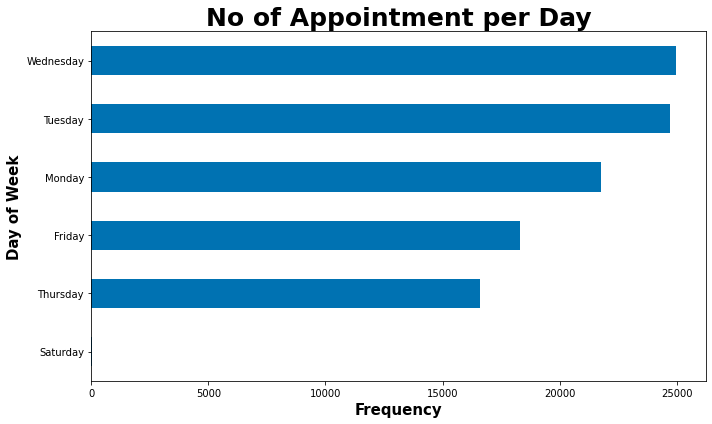

In [21]:
# Visualizing the day patient booked appointment
(df_cleaned['DayOfWeek']
.value_counts(ascending=True)
.plot(kind='barh',figsize=(10,6))
)
plt.ylabel("Day of Week", size=15, weight="bold")
plt.xlabel("Frequency", size=15, weight="bold")
plt.title('No of Appointment per Day', size=25, weight="bold")
plt.tight_layout();


### Research Question 2
> Percentage of people that show up or didn't show up for their appointment
* In this section we will investigate the number of patient that showed up or didn't show up for there appointment. This will help us get insight as to how health conscious the people are.
* From the analysis below is shows that patient don't end up showing up for their appointment as 20.18% of petient end up showing up for there appointment
* Hence, it is best that the government, NGO etc. needs to increase awareness campaign on health care 

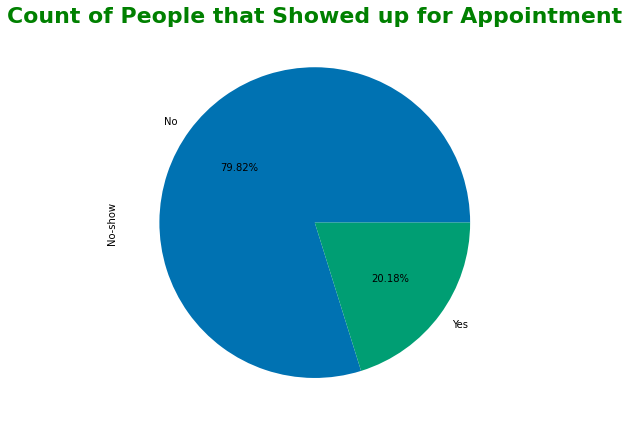

In [5]:
(df_cleaned["No-show"]
            .value_counts()
            .plot
            .pie(figsize=(6,6), autopct='%.2f%%')
)
plt.title("Count of People that Showed up for Appointment", size = 22, weight="bold", color="g")
plt.tight_layout();

### Research Question 3
* Age distribution using box plot and histogram
* Patient that book appointment falls within age 20 - 60 which are mostly adult.
* Which raise a question has to how the healthcare of the old and children are been handled

In [23]:
df_cleaned["Age"].describe()

count    106378.00000
mean         38.31749
std          22.47617
min           1.00000
25%          19.00000
50%          38.00000
75%          56.00000
max         115.00000
Name: Age, dtype: float64

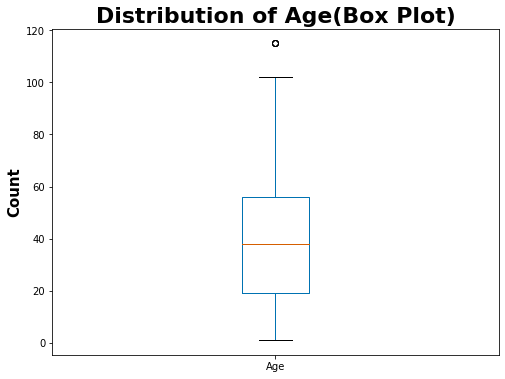

In [24]:
plt.figure(figsize=(8,6))
df_cleaned["Age"].plot.box()
plt.ylabel("Count", size=15, weight="bold")
plt.title("Distribution of Age(Box Plot)", size=22, weight="bold");

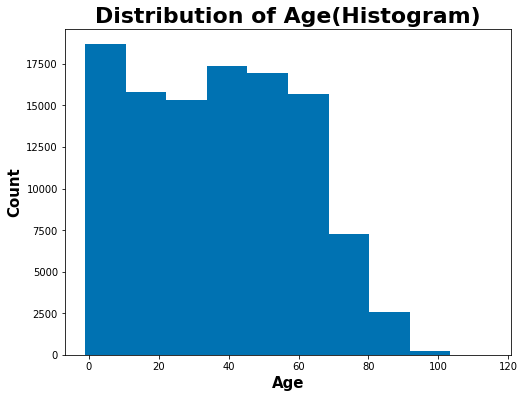

In [25]:
plt.figure(figsize=(8,6))
df["Age"].plot.hist()
plt.ylabel("Count", size=15, weight="bold")
plt.xlabel("Age", size=15, weight="bold")
plt.title("Distribution of Age(Histogram)", size=22, weight="bold");

### Research Question 4
* Neighbourhood that highest frequency of booking appointment

In [26]:
top_10_neighbour = df["Neighbourhood"].value_counts()[:10]
top_10_neighbour

JARDIM CAMBURI       7621
MARIA ORTIZ          5804
RESISTÊNCIA          4387
JARDIM DA PENHA      3873
ITARARÉ              3470
CENTRO               3310
TABUAZEIRO           3123
SANTA MARTHA         3103
JESUS DE NAZARETH    2852
BONFIM               2761
Name: Neighbourhood, dtype: int64

### Research Question 5
* Understanding patient that show up or not base on region
* Here we are increase in awarding metric has to how each region are concern about their health and with JARDIM CAMBURI leading the group

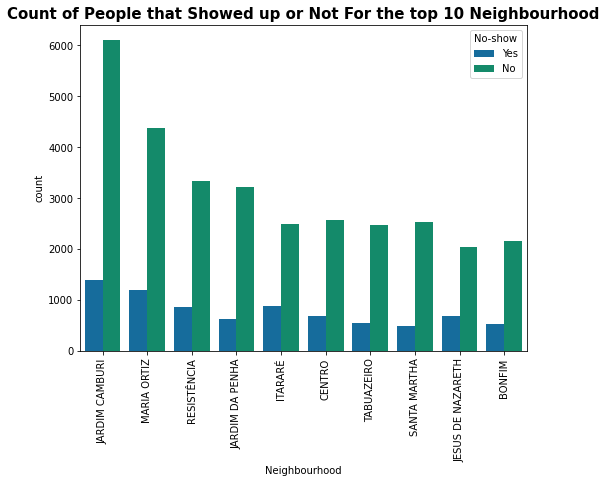

In [27]:
x = (df_cleaned
    .groupby(df["Neighbourhood"])["No-show"]
    .value_counts(ascending=True)
    .to_frame(name="count")
    .reset_index()
    .set_index("Neighbourhood")
    .loc[top_10_neighbour.index, :]
    .reset_index())
plt.figure(figsize=(8,6))
sns.barplot(data=x, x="Neighbourhood", y="count", hue="No-show")
plt.title("Count of People that Showed up or Not For the top 10 Neighbourhood", size=15, weight="bold", wrap=True)
plt.xticks(rotation=90);

### Research Question 6
* Understanding patient that show up or not base on gender
* Generally speaking has confirmed in the previous section that many patient do not show up for there appointment the bar chart below also confirm the point and further indicates that female tend to show up more than male.
* The possible cause could be because of the workload on the male. hence a campaign for male health matters could have raise awareness on the need for males to take care of themselves

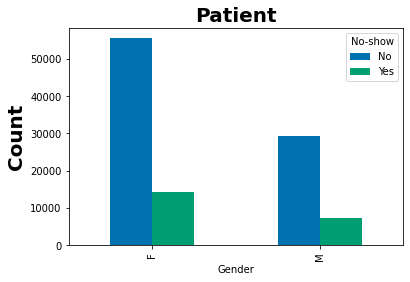

In [28]:
pd.crosstab(df_cleaned["Gender"], df_cleaned["No-show"]).plot.bar();
plt.title("Patient", size=20, weight="bold")
plt.ylabel("Count", size=20, weight="bold");

### Research Question 7
* Count of numerical columns to gain better understanding of different group participation in terms of booking appointment

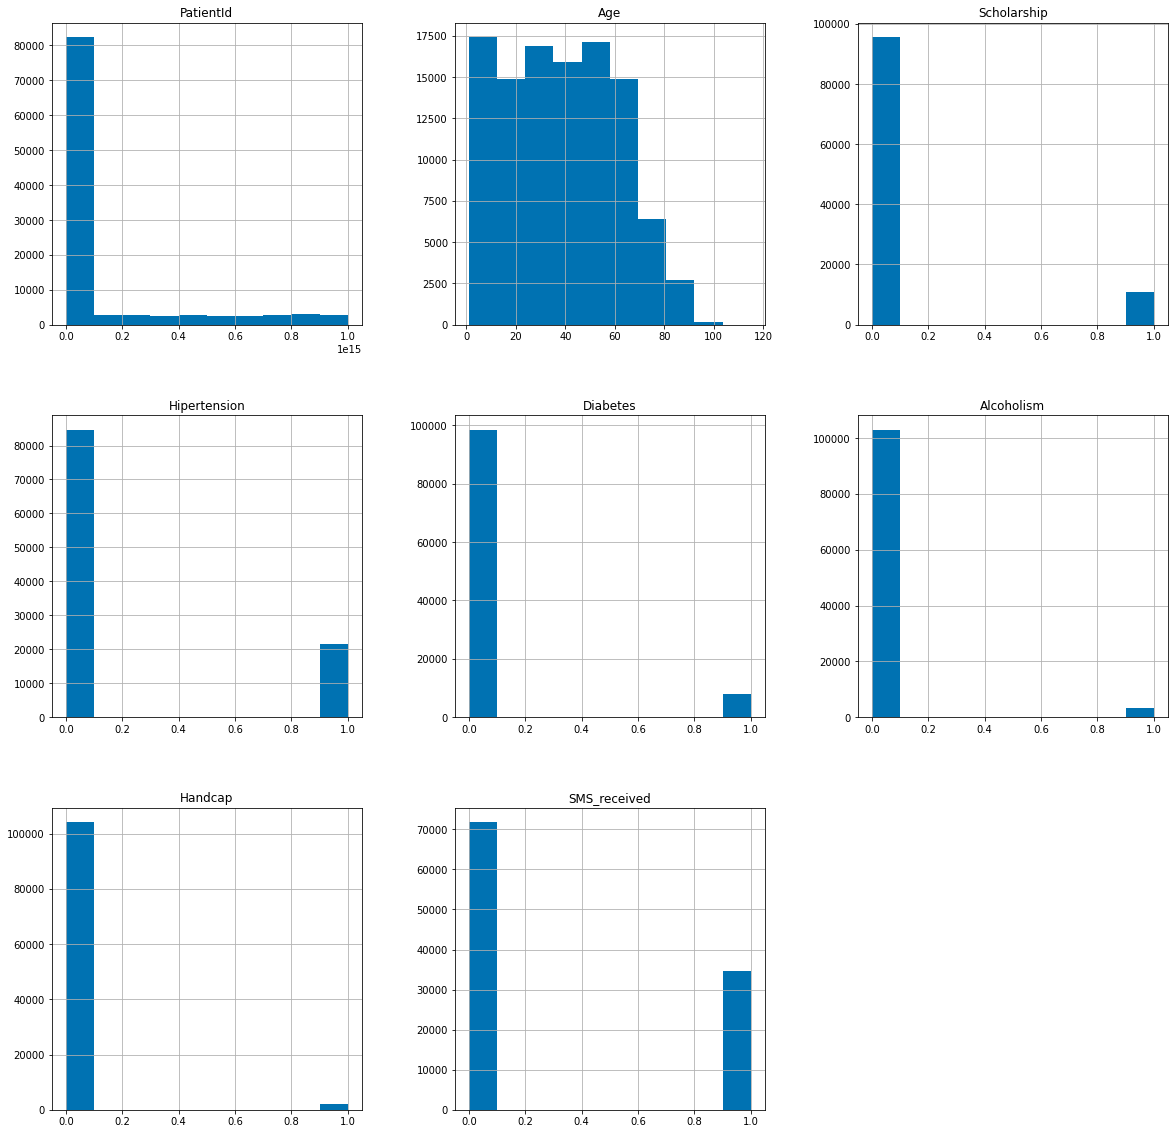

In [29]:
df_cleaned.select_dtypes(include=np.number).hist(figsize=(20, 20));

<a id='conclusions'></a>
## Conclusions

> The analysis shows that 79.81% didnt show up for their appointmnet while 20.19% showed up. This indicates that several variables were correlated with No Shows.
>
> region like JARDIM CAMBURI, MARIA ORTIZ, RESISTÊNCIA were ranked among the first ten region that booked appointment which is an indication that they are more health concious in those region
>
> Generally the data reveals that many tends to book appointment but do not end up showing up for the appointment
>
> Also female tend to show up for their appointment compare to their male counterpart

## Limitation
> The data is limited to only 2016 hence it might not necessarily generalize to present realities
>
> Another drawback is that the field handcap has values other values aside the expected values of 0 and 1 hence it might be difficult to correctly identify if the patient is handcap or not which can influence the end result of any analysis that is based on the handcap field



In [35]:
import os
os.system("jupyter nbconvert --execute --to html Investigate_a_Dataset.ipynb")

0